#<font color='REDBLUE'>**Departamento de Marketing**</font> 

- *Arendizado Não-Supervisionado*

## <font color='BLUE'> **1° Problema de Negócio** </font>

- Construir uma Máquina Preditiva que, a partir de dados de comportamento de clientes, agrupe-os por similaridade, para que possamos compreender melhor os clientes, a fim de direcionar melhor as campanhas e marketinge e a estratégia de negócio da empresa.

## <font color='BLUE'> **2° Análise Exploratória** </font>

In [1]:
!pip install yellowbrick

#### **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer

In [3]:
# Lendo os Dados
from datetime import datetime
print(datetime.now())
df_card = pd.read_csv('/content/Marketing_data.csv')
print(datetime.now())

2022-04-18 22:27:09.806735
2022-04-18 22:27:09.858628


In [4]:
# Verificar o tamanho da base de dados "(Linhas, Colunas)"
df_card.shape

(8950, 18)

In [5]:
# Visualizando as 5 primeiras lindas da base de dados
df_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### <font color='purple'>**Descrição das Variáveis**</font> 

- **CUSTID** : Identificação do titular do cartão de crédito.

- **BALANCE** : Saldo restante em sua conta para fazer compras

- **BALANCEFREQUENCY** : Frequência de atualização do saldo.

  - $1$ → atualizado com frequência

  - $0$ → não atualizado com frequência

- **PURCHASES** : Quantidade de compras feitas a partir da conta 

- **ONEOFFPURCHASES** : Valor máximo de compras feitas de uma só vez (*ou seja, a vista*)

- **INSTALLMENTSPURCHASES** : Quantidade de compras feitas a prazo ou parceladas

- **CASHADVANCE** : Dinheiro adiantado dado pelo usuário

- **PURCHASESFREQUENCY**: Com que frequência as compras estão sendo feitas. 

  - $1$ → compra com frequência

  - $0$ → compra com pouca frequência

- **OONEOFFPURCHASESFREQUENCY** : Com que frequência as compras estão acontecendo de uma só vez.

  - $1$ → com muita frequência
  
  - $0$ → com pouca ou sem frequência

- **PURCHASESINSTALLMENTSFREQUENCY** : Com que frequência as compras parceladas estão sendo feitas.

   - $1$ → feito com frequência
   
   - $0$ → feito com pouca frequência

- **CASHADVANCEFREQUENCY** : Com que frequência o dinheiro adiantado está sendo pago.

- **CASHADVANCETRX** : Número de transações feitas com o "*Dinheiro adiantado*".

- **PURCHASESTRX** : Número de transações de compra feita.

- **CREDITLIMIT**: Limite do Cartão de Crédito

- **PAYMENTS**: Valor do pagamento feito pelo usuário

- **MINIMUM_PAYMENTS** : Valor mínimo dos pagamentos feitos pelo usuário

- **PRCFULLPAYMENT** : Percentual do pagamento integral (*ou seja, pagamento completo da fatura do cartão).

- **TENURE** : Tempo de serviço do cartão de crédito para o usuário



Link dos dados:  https://www.kaggle.com/arjunbhasin2013/ccdata

#### <font color='purple'>**Conhecendo os Dados**</font> 

In [6]:
# Verificando informações 
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Verificando informações 
df_card.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
# Verificando se há valores Missing (valores ausentes)
df_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
!pip install missingno

In [10]:
import missingno

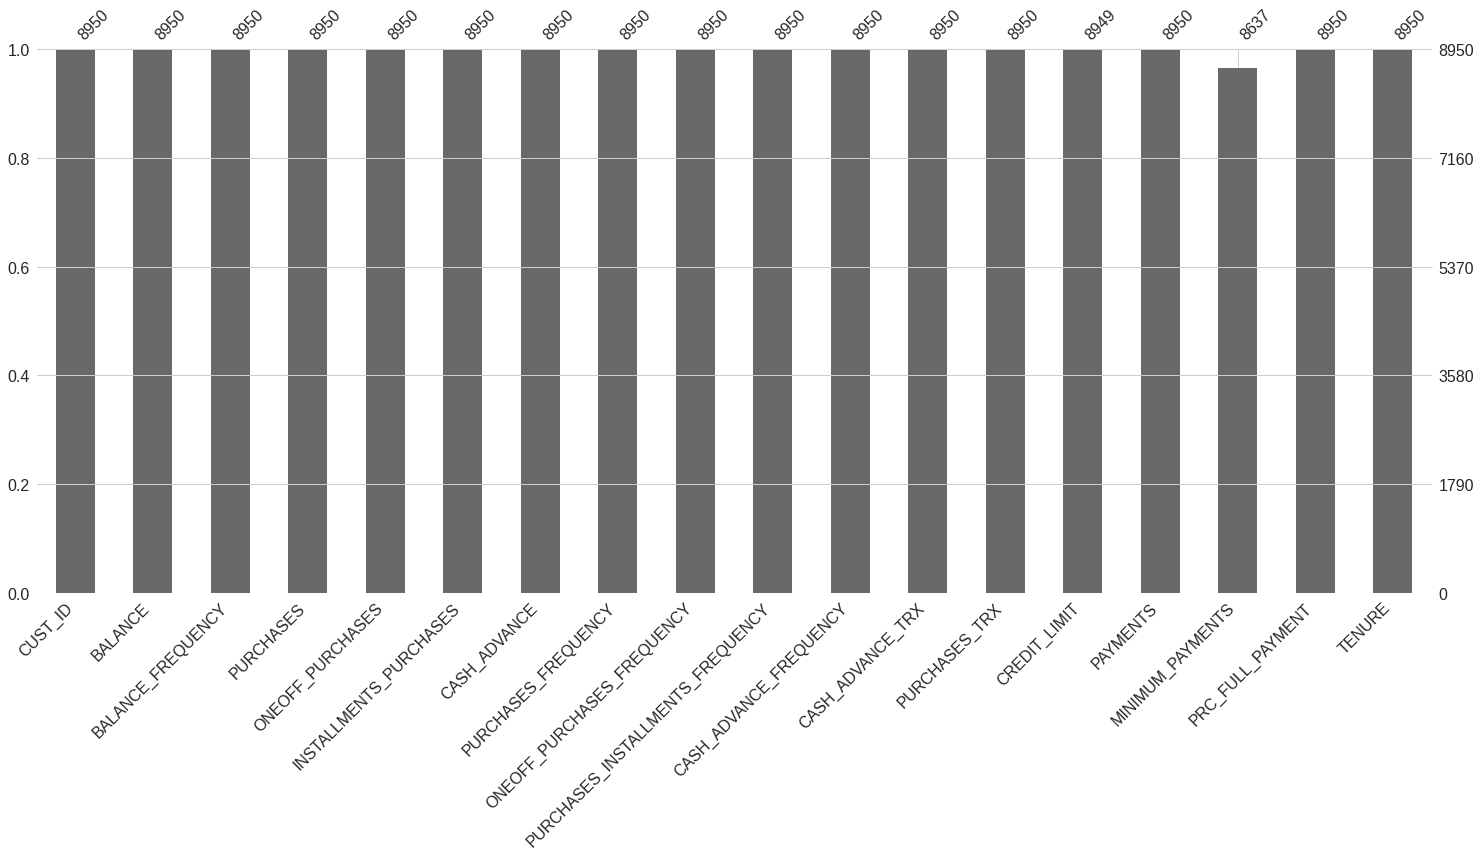

In [11]:
missingno.bar(df_card);

In [12]:
# Verificando se há linhas duplicadas
df_card.duplicated().sum()

0

In [13]:
# Estatística Descritiva das Variáveis:
df_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
# Entendendo o cliente que fez a maior compra a vista
df_card[df_card['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [15]:
# Cliente que fez mais compras usando o limite do cartão de credito
df_card[df_card['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#### **Fazendo imputação nos valores nulos**

In [16]:
# Calculando a média
df_card['MINIMUM_PAYMENTS'].mean()

df_card['CREDIT_LIMIT'].mean()

4494.449450364621

In [17]:
df_card.loc[(df_card['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df_card['MINIMUM_PAYMENTS'].mean()

df_card.loc[(df_card['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df_card['CREDIT_LIMIT'].mean()

In [18]:
df_card.isnull().sum().sum()

0

- **Eliminando o ID** 

In [19]:
df1 = df_card.drop('CUST_ID', axis=1)
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
# Verificando as colunas
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [21]:
# Verificando o tamanho da base de dados
len(df1.columns)

17

- **Gráficos** - *Histogramas*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

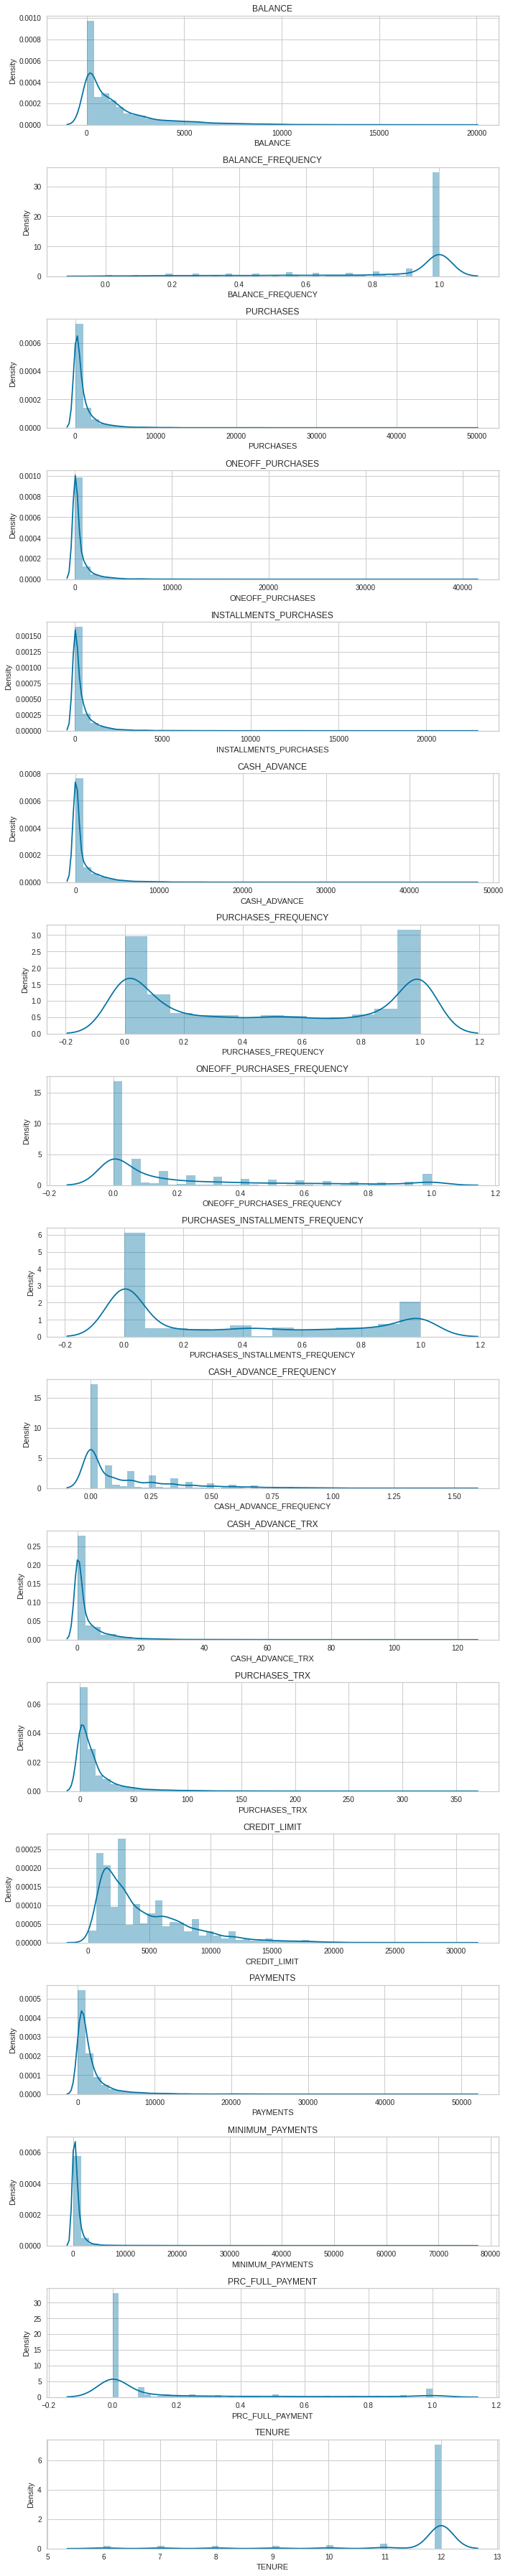

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(df1.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(df1[df1.columns[i]], kde = True)
  plt.title(df1.columns[i])
plt.tight_layout();

- **Correlação**

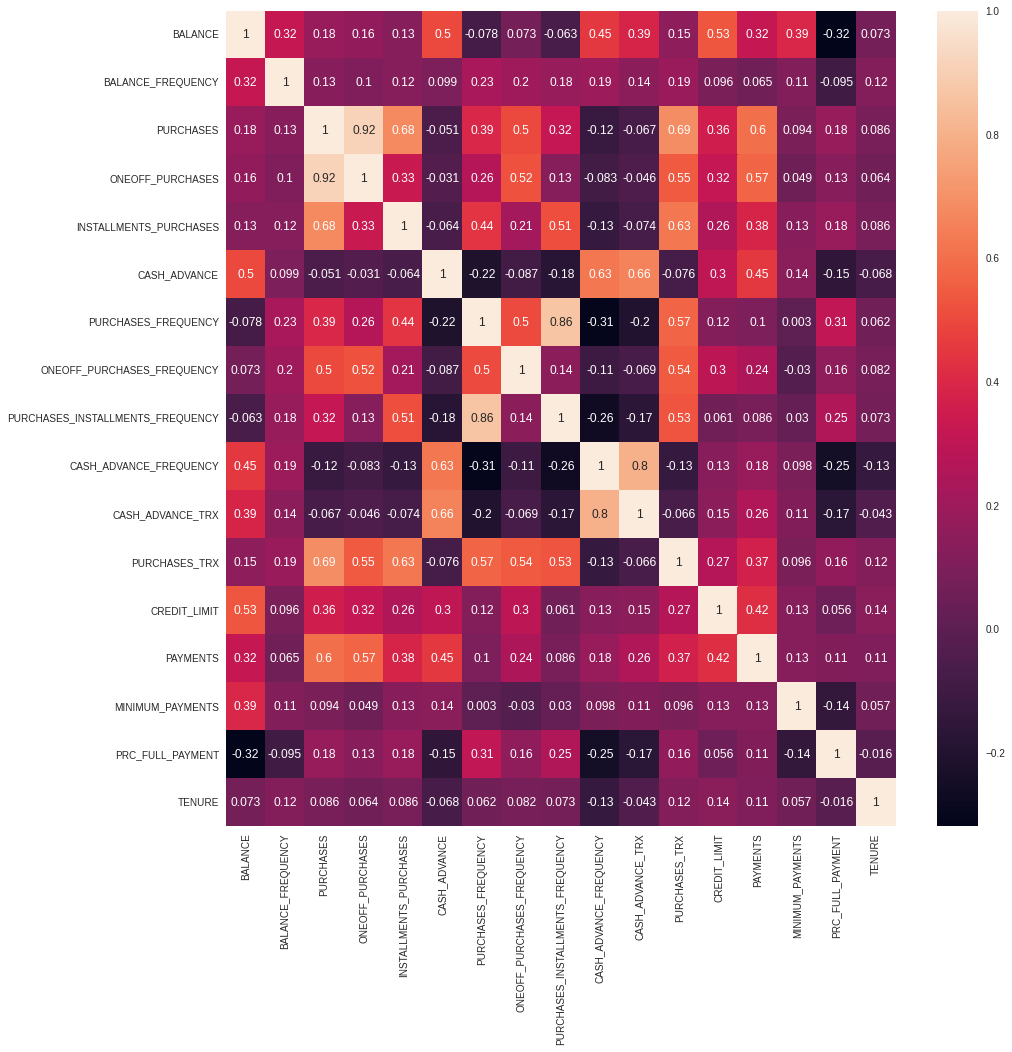

In [23]:
correlations = df1.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True);

## <font color='BLUE'> **3° Pré-Processamento dos Dados** </font>

### <font color = 'Chocolate'> **Padronização**</font>

In [24]:
# Padronizando os dados
scaler = StandardScaler()
X_test = scaler.fit_transform(df1)

In [25]:
# Visualizando
X_test

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### **Determinando o número de** <font color = 'Goldenrod'> **Clusters**</font>

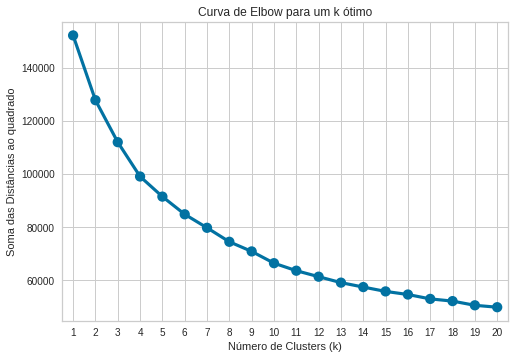

In [26]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,21):
    km_model= KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km_model= km_model.fit(X_test)
    sum_of_sq_dist[k] = km_model.inertia_
    
# Visualizando Graficamente 
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma das Distâncias ao quadrado')
plt.title('Curva de Elbow para um k ótimo')
plt.grid(True)
plt.show()

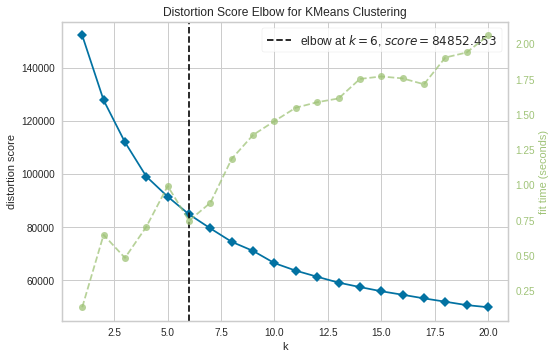

In [27]:
# Outra forma de visualizar
model = KMeans(random_state=7)
distortion_visualizer = KElbowVisualizer(model, k=(1,21))

distortion_visualizer.fit(X_test)       
distortion_visualizer.show(); 

### <font color = 'Darkorange'> **Verificando o valor da Silhouette para cada valor de**</font> **k**

In [28]:
 # Silhouette Score
    
K = range(3,11)
    
from sklearn.metrics import silhouette_score

for k in K: 

# Criando e Treinando o Modelo

    km = KMeans(n_clusters=k).fit(X_test) 
    silhouette_avg = silhouette_score(X_test, km.labels_)
    print("Para o Cluster =", k,
    "A Silhouette média é :", silhouette_avg)

Para o Cluster = 3 A Silhouette média é : 0.2505299806322502
Para o Cluster = 4 A Silhouette média é : 0.1976074492720698
Para o Cluster = 5 A Silhouette média é : 0.1931688590154638
Para o Cluster = 6 A Silhouette média é : 0.20259398485856095
Para o Cluster = 7 A Silhouette média é : 0.21481526659200273
Para o Cluster = 8 A Silhouette média é : 0.22189996385758237
Para o Cluster = 9 A Silhouette média é : 0.22650374196333664
Para o Cluster = 10 A Silhouette média é : 0.21982669248049075


### <font color = 'Darkorange'> **Critério de escolhe do melhor valor de**</font> **k**


Para n_clusters = 3 Silhouette_score média : 0.2505299806322502
Para n_clusters = 4 Silhouette_score média : 0.1976074492720698
Para n_clusters = 6 Silhouette_score média : 0.20259398485856095
Para n_clusters = 8 Silhouette_score média : 0.2185524558994579
Para n_clusters = 10 Silhouette_score média : 0.21174524877798345


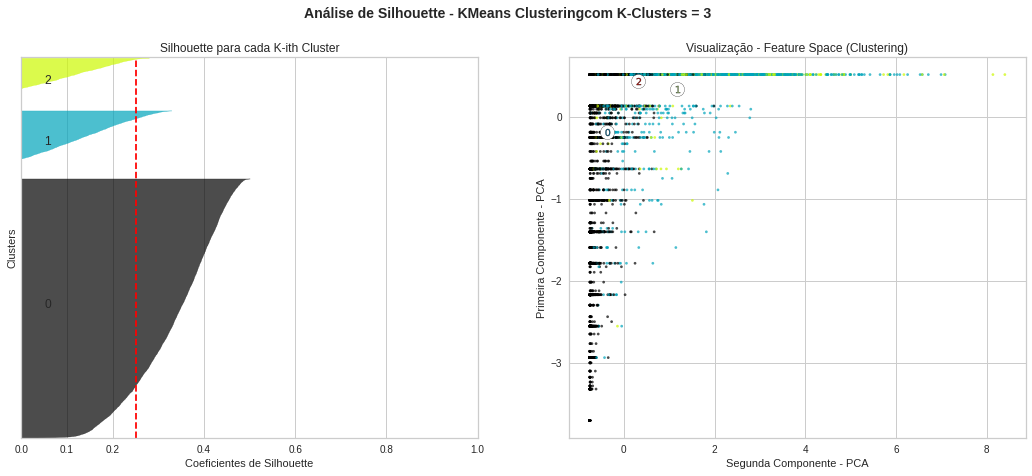

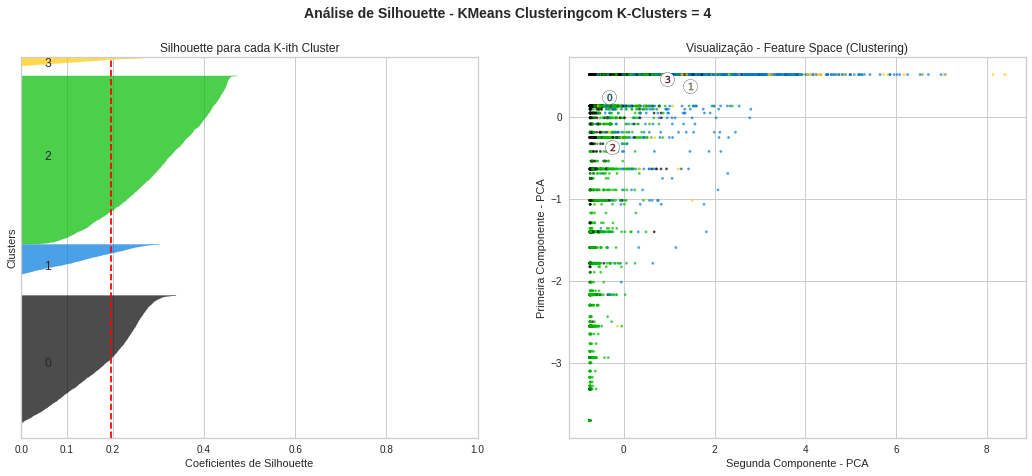

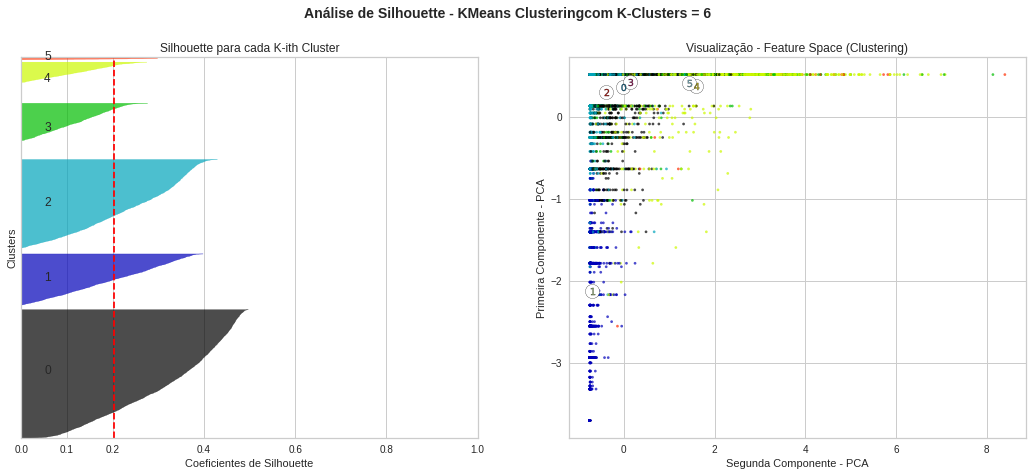

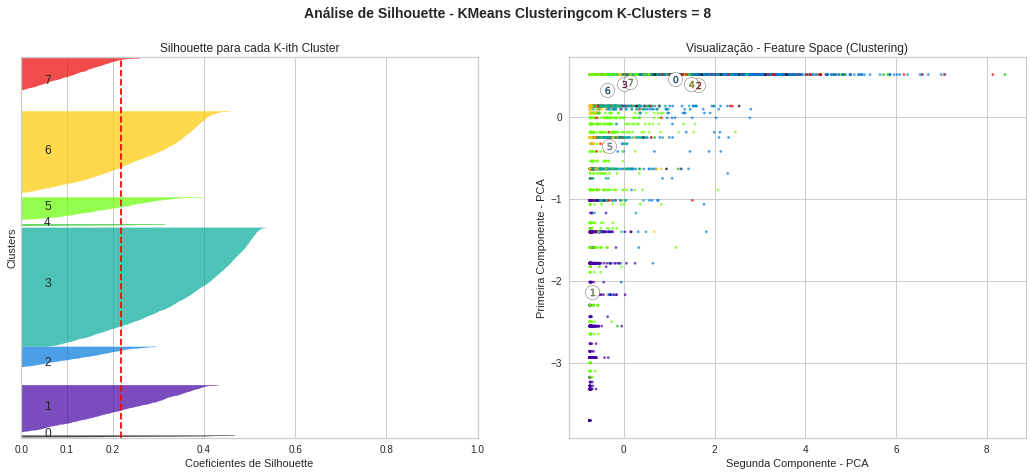

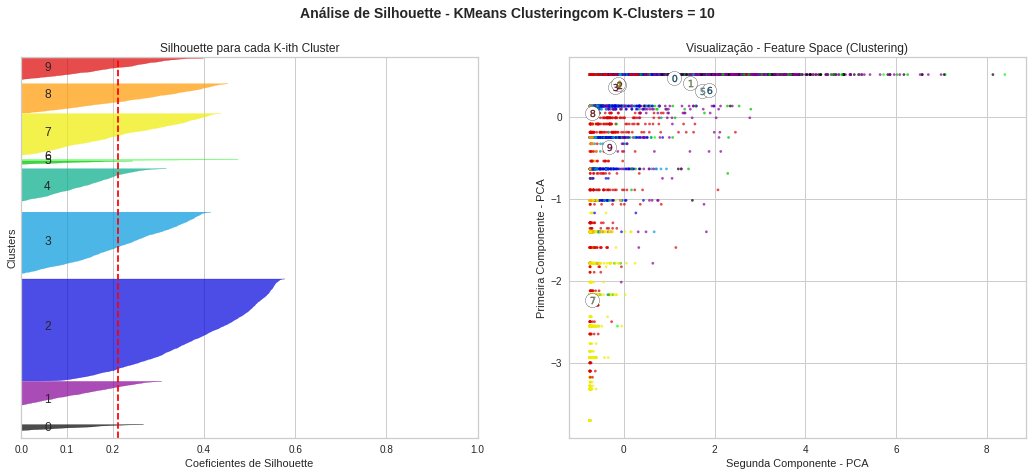

In [29]:
# Visualizando Gráficamento os valores de K

# Pegando os valores de K que apresentam um melhor Scor
range_n_clusters = [3, 4, 6, 8, 10]
for n_clusters in range_n_clusters:
    
    # Criação de subplot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([0.1, 1])
    ax1.set_ylim([0, len(X_test) + (n_clusters + 1) * 10])

    # Criando e treinando o algoritmo 
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_test)
    
   
    # Calculando o valaor de Silhouette Score para cada valor de K
    silhouette_avg = silhouette_score(X_test, cluster_labels)
    print('Para n_clusters =', n_clusters,
          'Silhouette_score média :', silhouette_avg)
    
    # Calculando a Silhouette para cada amostra
    sample_silhouette_values = silhouette_samples(X_test, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Criando os gráficos de silhouette acordo com o número de Cluster
        ax1.text(0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Calculando um novo valor para Y
        y_lower = y_upper + 10  
    ax1.set_title('Silhouette para cada K-ith Cluster')
    ax1.set_xlabel('Coeficientes de Silhouette')
    ax1.set_ylabel('Clusters')

    # Criando uma linha Vertical de acordo o valor da Silhouette Média
    # Essa linha nos indica que se um determinado valor de K, está dentro ou fora dessa linha de corte.
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax1.set_yticks([])  
    ax1.set_xticks([0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Visualizando os gráficos 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_test[:, 0], X_test[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Criando os rotulos para os clusters
    centers = clusterer.cluster_centers_

    # Criando círculos nos centróides 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c='white', alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title('Visualização - Feature Space (Clustering)')
    ax2.set_xlabel('Segunda Componente - PCA')
    ax2.set_ylabel('Primeira Componente - PCA')
    plt.suptitle(('Análise de Silhouette - KMeans Clustering'
                  'com K-Clusters = %d' % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

## <font color='BLUE'> **4° Criação da Máquina Preditiva** </font>

In [30]:
km = KMeans(n_clusters=3, init='k-means++', random_state=7)

# return a label for each data point based on their cluster
predict = km.fit_predict(X_test)

In [31]:
# Visualizando 
print(predict)

[2 1 2 ... 2 2 2]


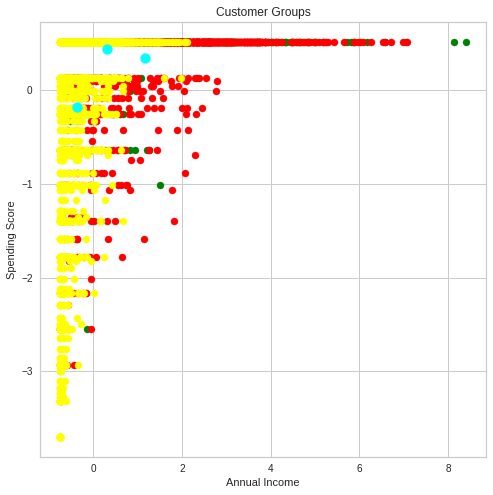

In [32]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X_test[predict==0,0], X_test[predict==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_test[predict==1,0], X_test[predict==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_test[predict==2,0], X_test[predict==2,1], s=50, c='yellow', label='Cluster 3')
#plt.scatter(X_test[predict==3,0], X_test[predict==3,1], s=50, c='violet', label='Cluster 4')
#plt.scatter(X_test[predict==4,0], X_test[predict==4,1], s=50, c='blue', label='Cluster 5')
#plt.scatter(X_test[predict==5,0], X_test[predict==5,1], s=50, c='purple', label='Cluster 6')

# plot the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show();

In [33]:
# Verificando a quantidade de elementos em cada Cluster
for elem in np.unique(predict):
    print(elem, predict.tolist().count(elem))

0 1235
1 1596
2 6119


### <font color = 'Darkorange'> **Adicionando a Coluna Cluster no DataFrame**</font>

In [34]:
# Adicionando a coluna Cluster no DataFrame
df_card['cluster'] = predict.tolist()

In [35]:
# Visualizando
df_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


## <font color = 'ligthstee'> **5° Avaliação da Máquina Preditiva**</font> $→$*Validação do Modelo*

#### <font color = 'LightSal'> **Calculando a Silhouette méda da Clusterizacao**</font>

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_test, predict)
print("A Silhouette_score média do modelo é  :", silhouette_avg)

A Silhouette_score média do modelo é  : 0.25055570796307736


#### Visualizando a **Silhouette média** do modelo

In [37]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(X_test)
    silhouette[k] = silhouette_score(X_test, km.labels_)

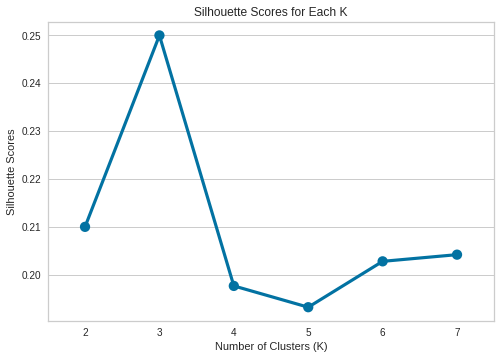

In [38]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

##### **Calculando a Silhueta Média para Cluster**

In [39]:
n_clust = 3

km = KMeans(n_clusters = n_clust, random_state=7)
km.fit(X_test)

silhouettes = silhouette_samples(X_test, km.labels_)

for k in range(n_clust):
  print("Silhueta Média para Cluster {:}: {:.2f} +- {:.2f}".format(k, 
                                                                   np.mean(silhouettes[km.labels_==k]),
                                                                   np.std(silhouettes[km.labels_==k]/np.sum(km.labels_==k)**.5)))

Silhueta Média para Cluster 0: 0.04 +- 0.00
Silhueta Média para Cluster 1: 0.09 +- 0.00
Silhueta Média para Cluster 2: 0.34 +- 0.00


### **Visualizando os grupos**

Text(0.5, 1.0, 'Clusters')

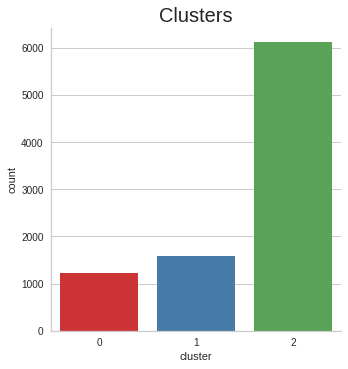

In [40]:
sns.catplot(x="cluster", kind="count", palette="Set1", data=df_card)
plt.title('Clusters', fontsize=20)

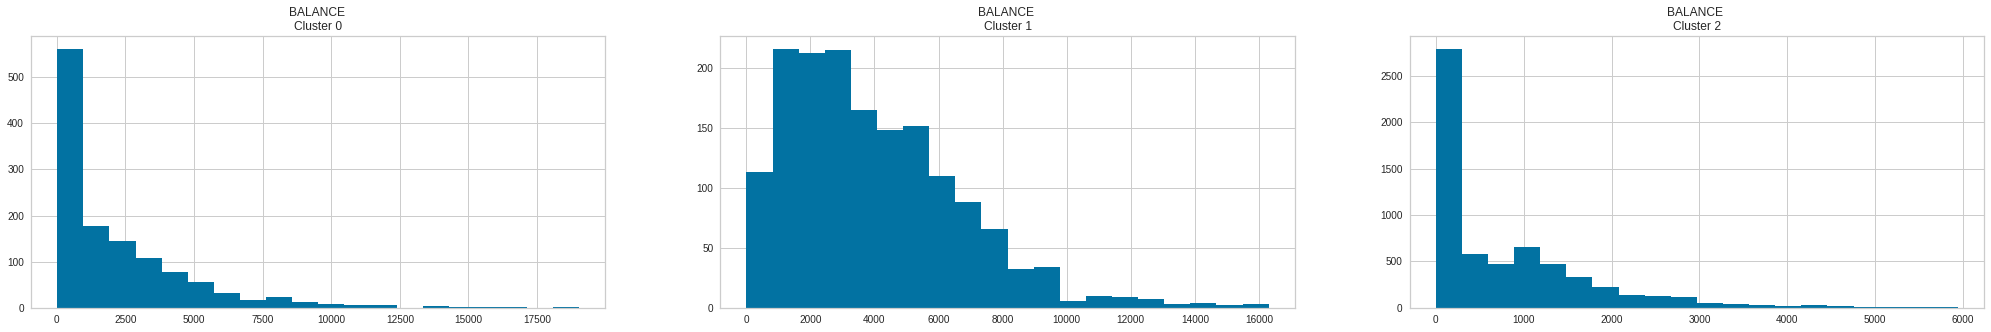

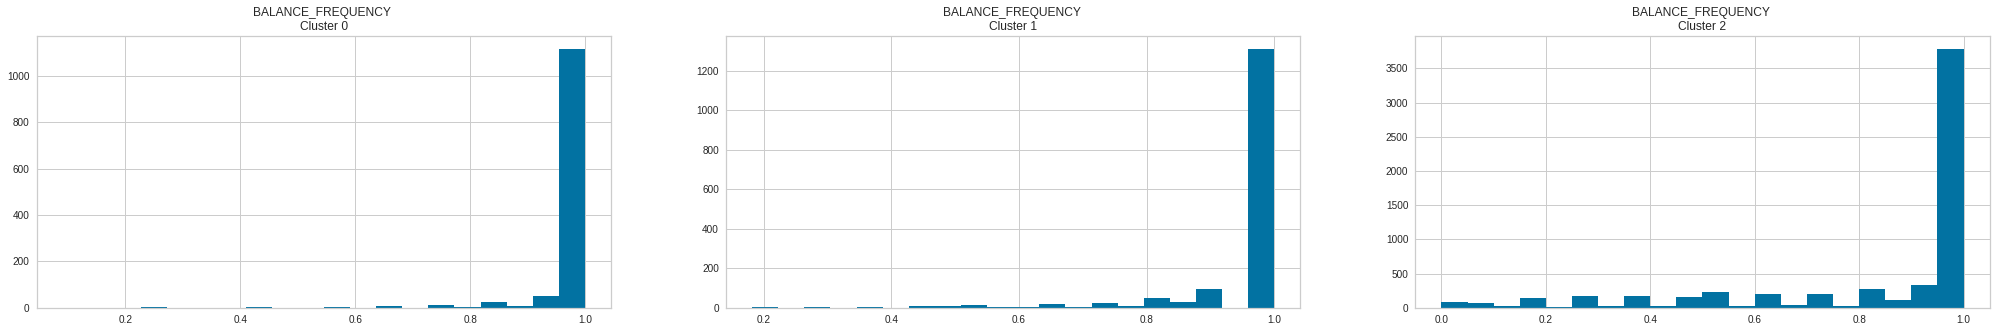

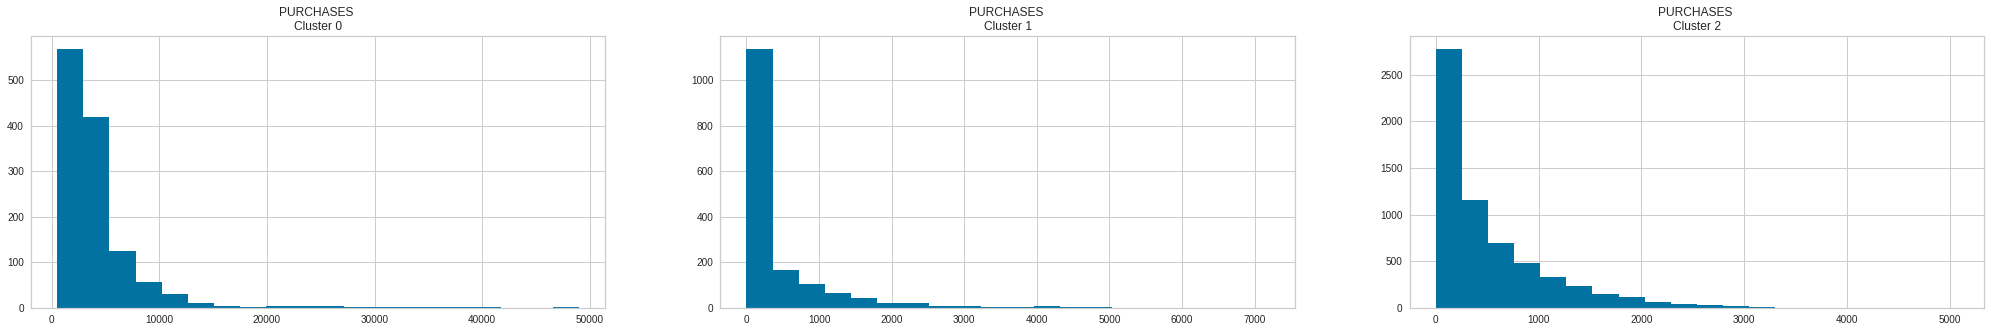

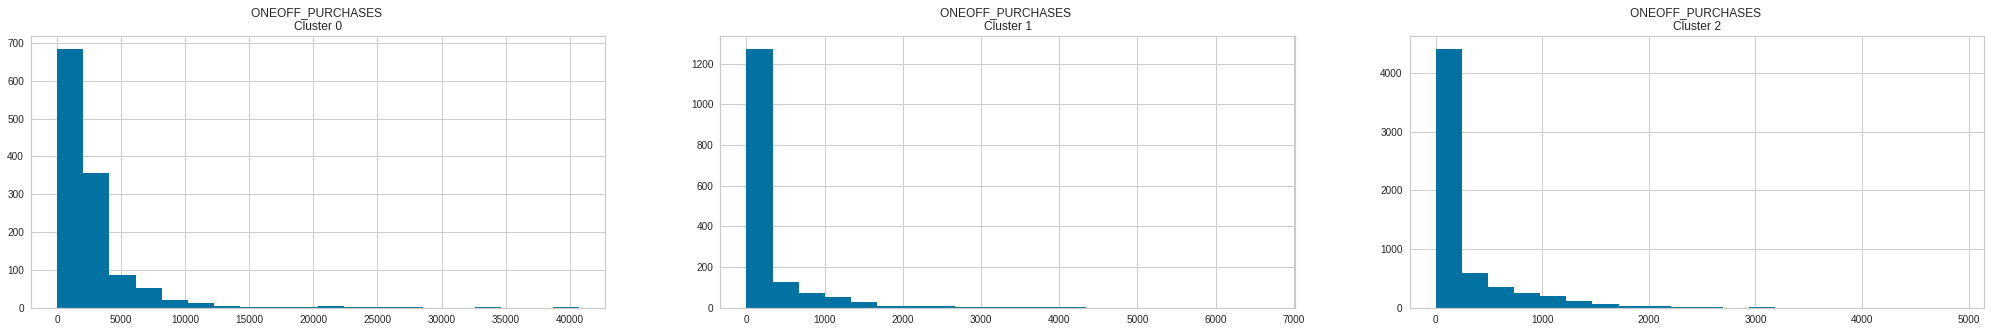

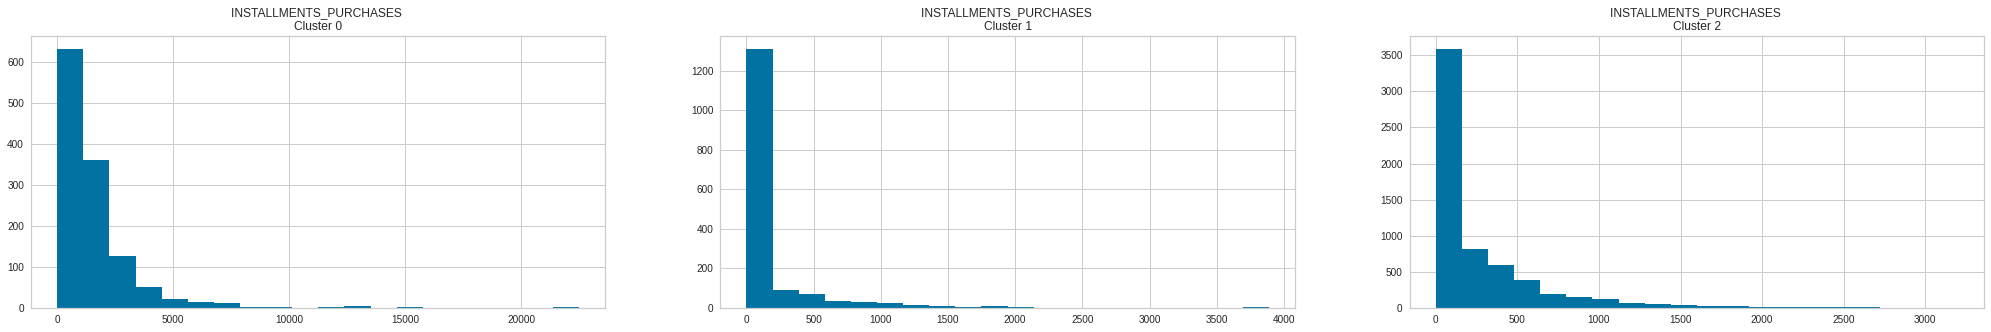

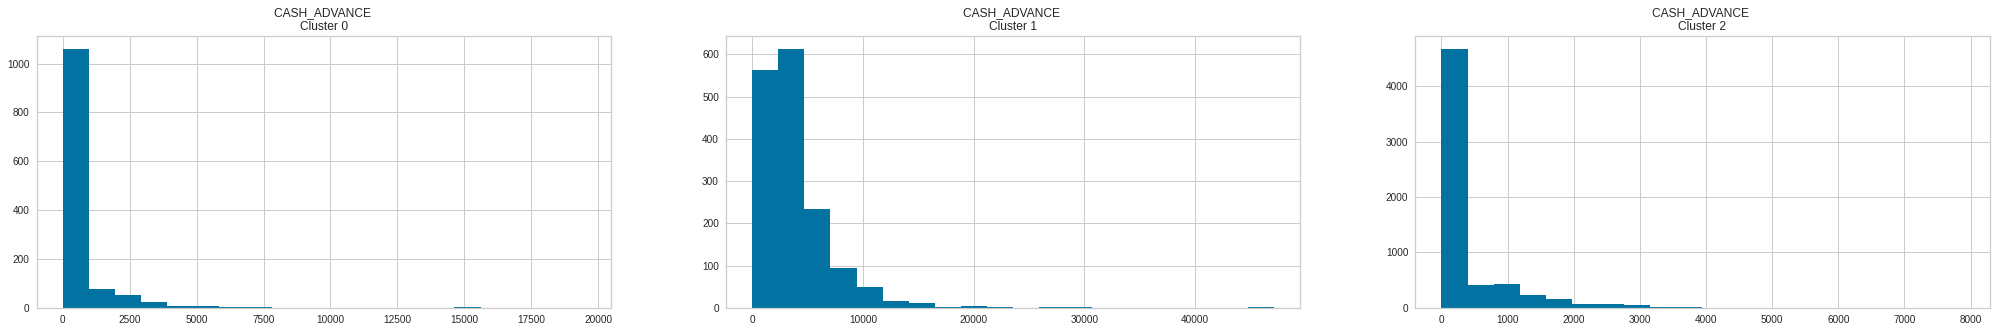

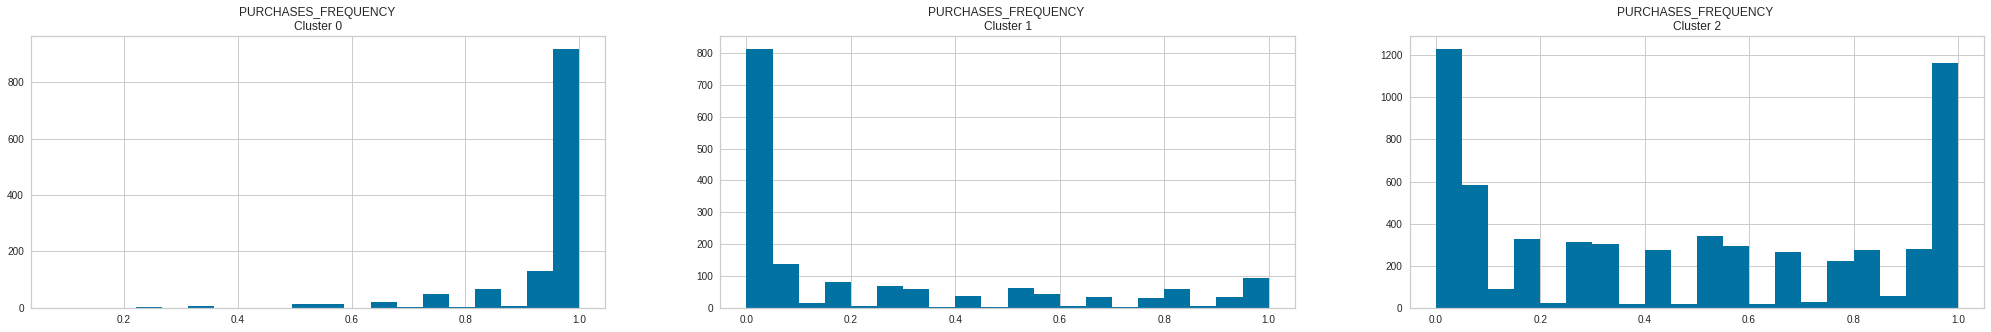

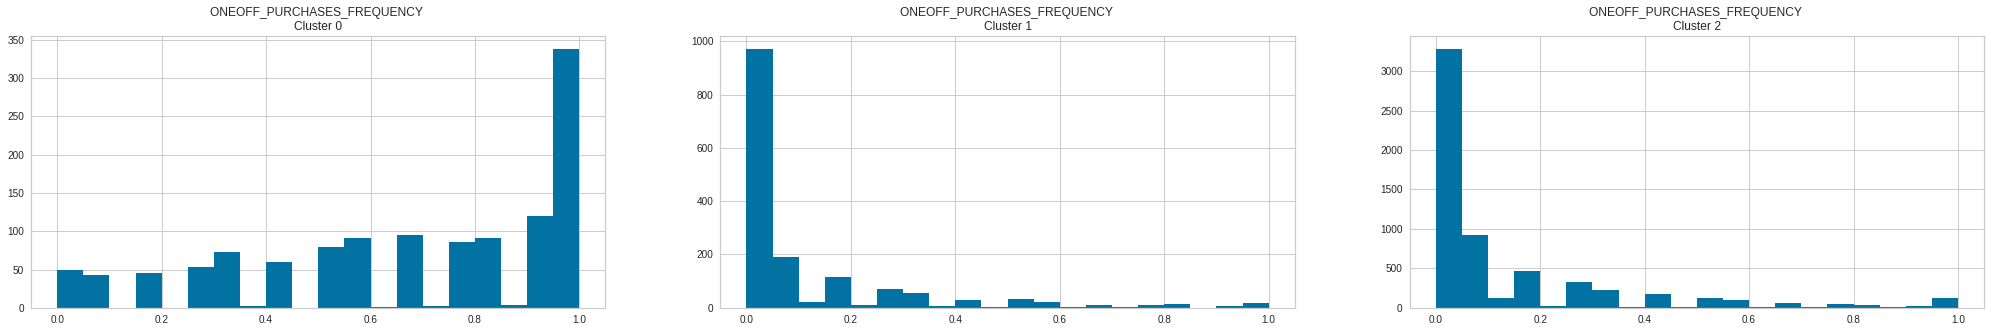

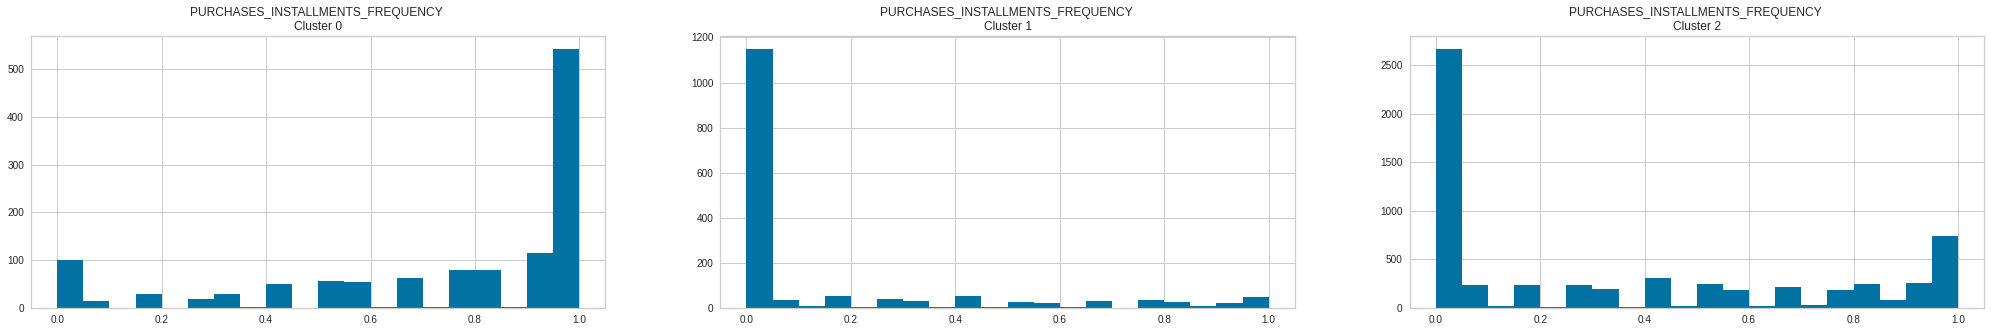

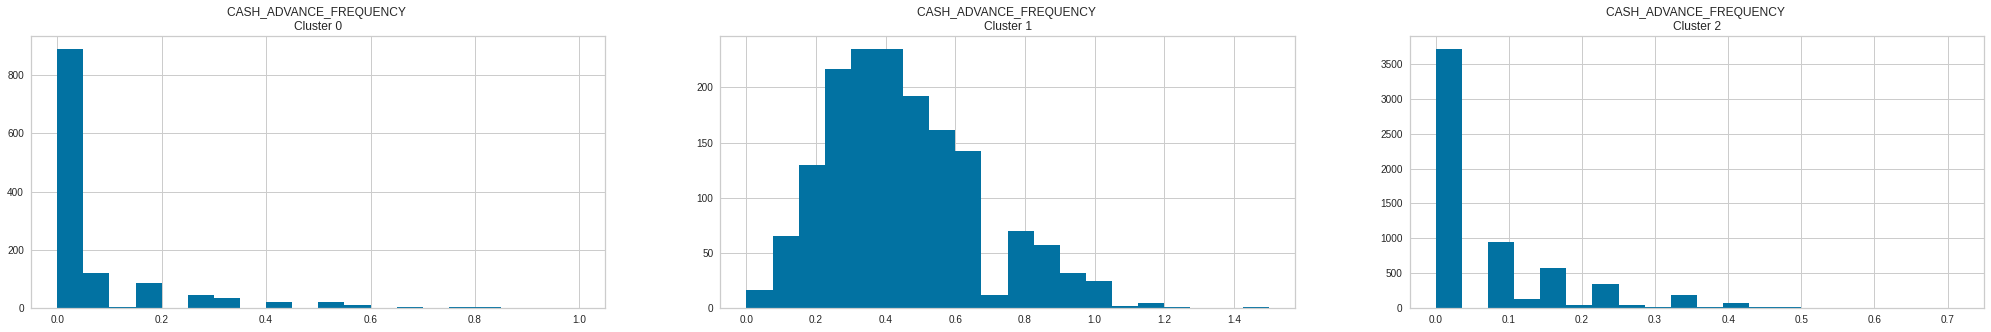

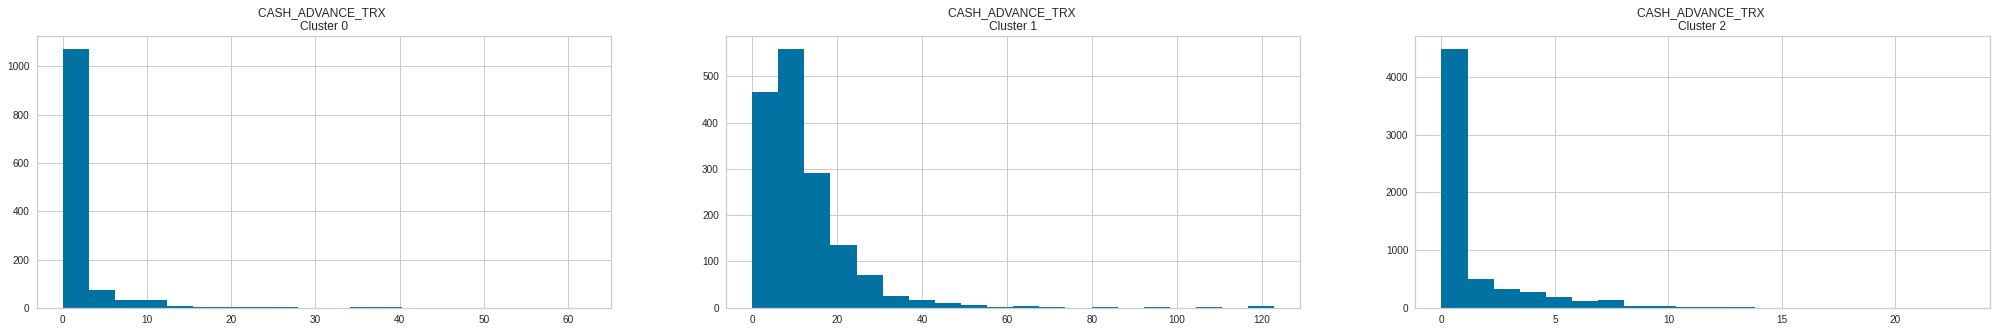

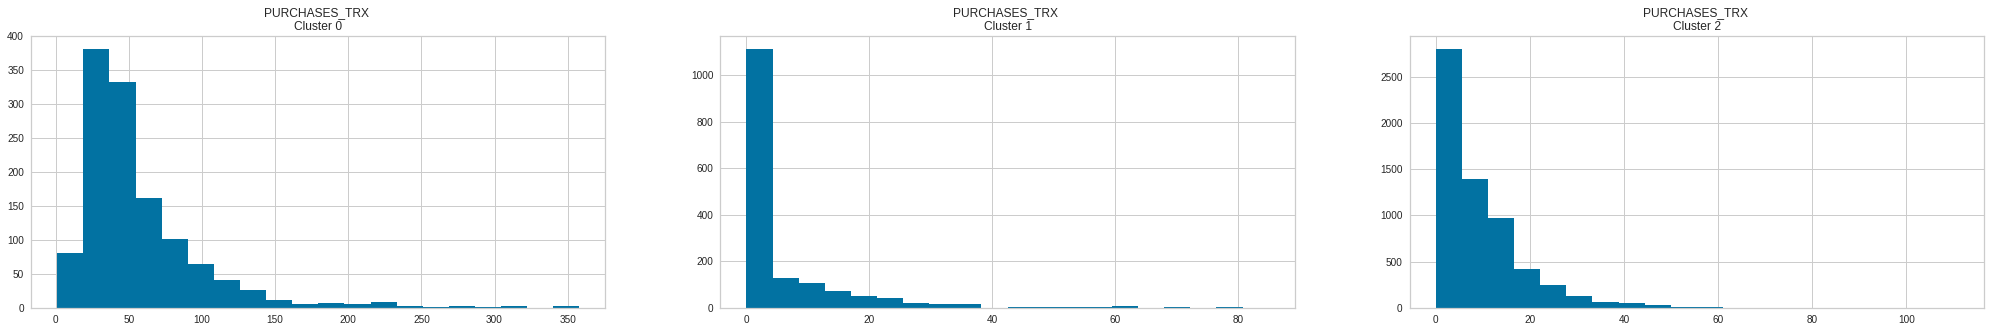

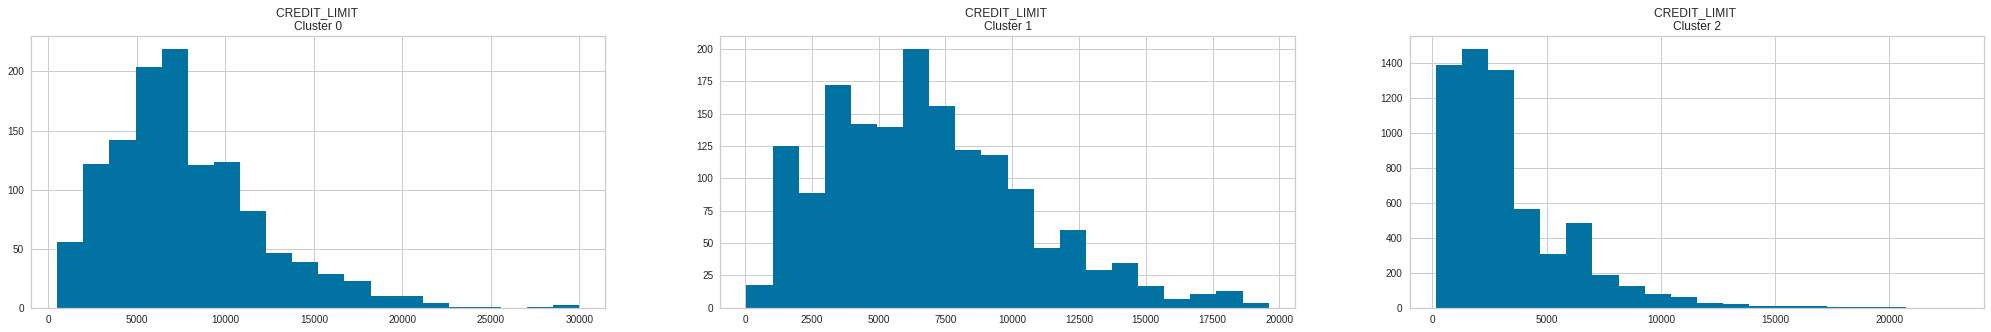

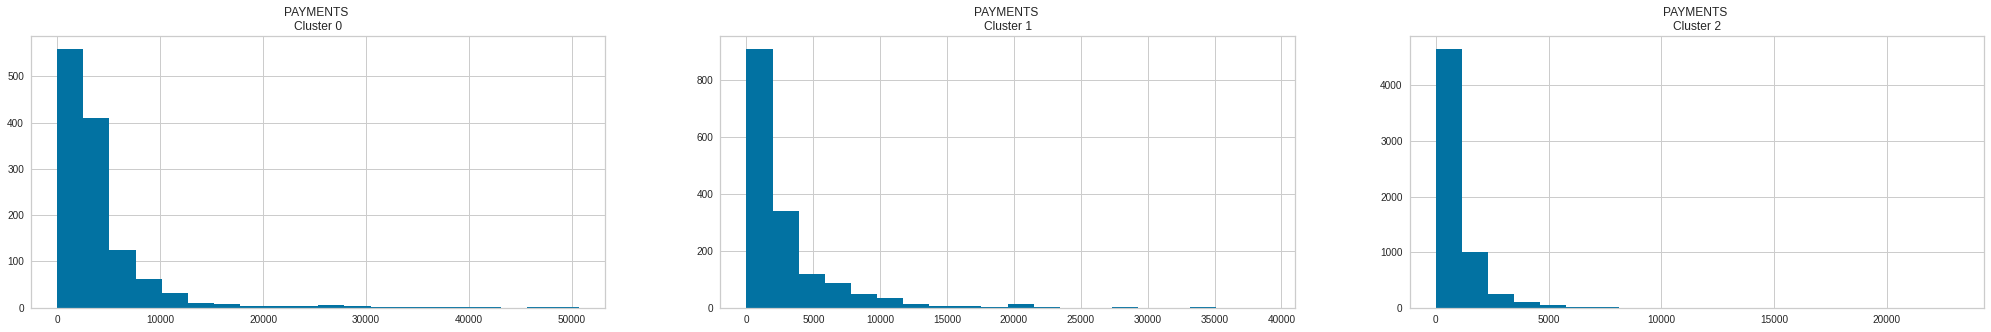

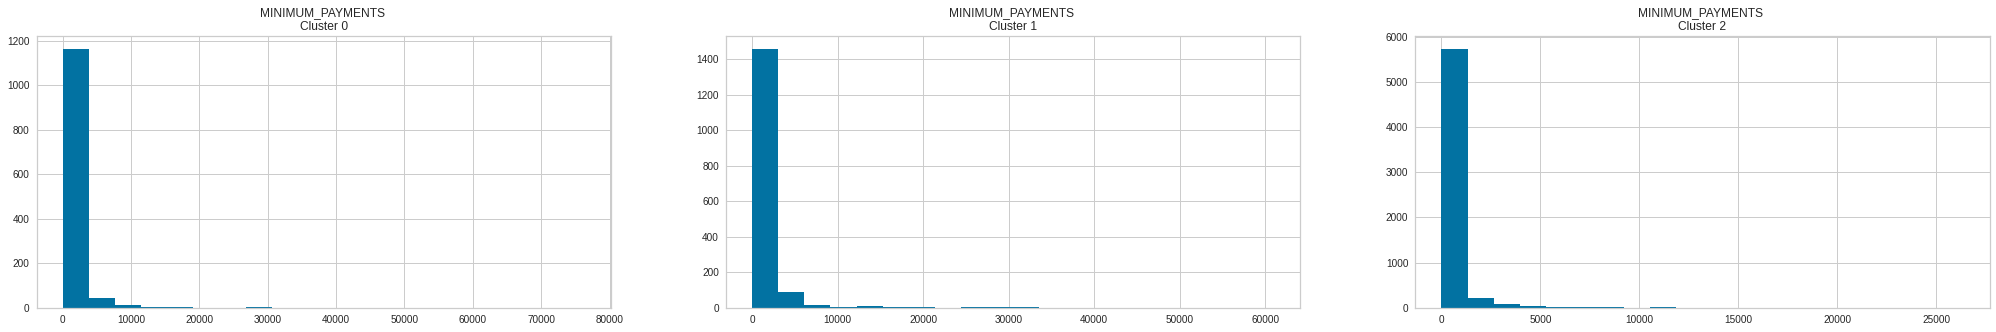

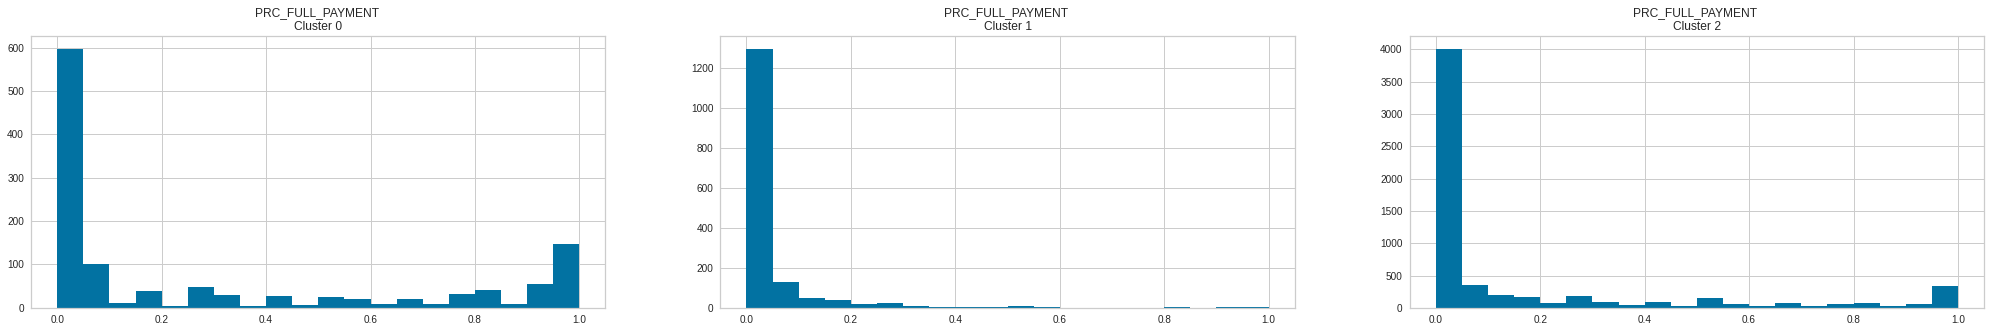

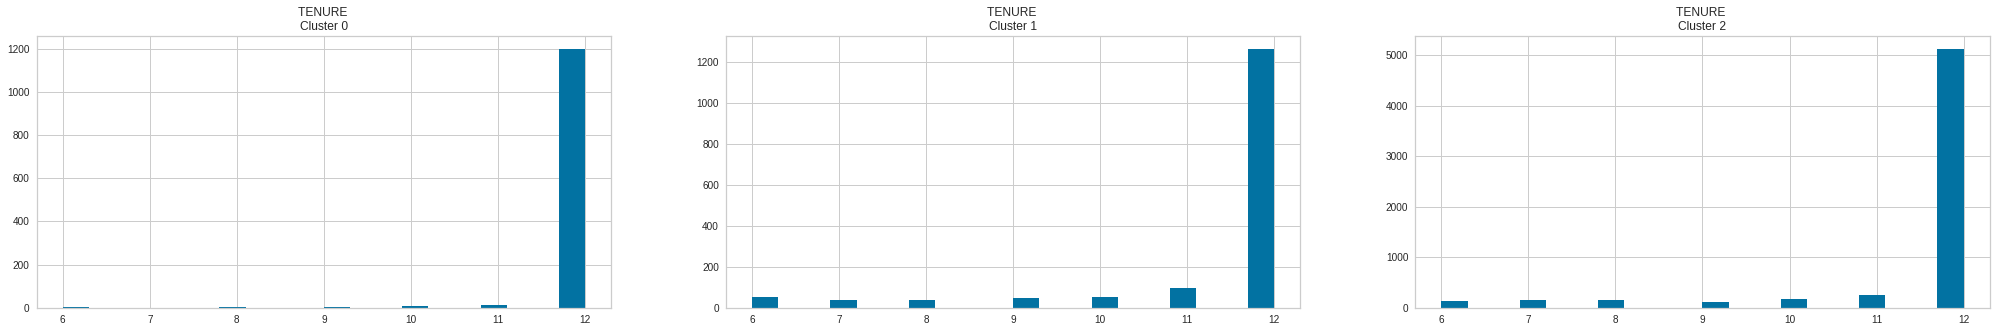

In [41]:
for i in df1.columns:
  plt.figure(figsize=(35,5))
  for j in range(3):
    plt.subplot(1, 3, j + 1)
    cluster = df_card[df_card['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [42]:
df_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
